In [1]:
#importing libraries
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('zameen-house.csv')
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [3]:
#overall information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [4]:
#dropping irrelevant columns
df.drop(['property_id','location_id','page_url'],axis=1,inplace=True)

In [5]:
#statistical summary of the data
df.describe()

,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


In [6]:
# checking and dropping duplicate data
df.duplicated().sum()

15016

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
#removing null values
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111272 entries, 4 to 168445
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  111272 non-null  object 
 1   price          111272 non-null  int64  
 2   location       111272 non-null  object 
 3   city           111272 non-null  object 
 4   province_name  111272 non-null  object 
 5   latitude       111272 non-null  float64
 6   longitude      111272 non-null  float64
 7   baths          111272 non-null  int64  
 8   area           111272 non-null  object 
 9   purpose        111272 non-null  object 
 10  bedrooms       111272 non-null  int64  
 11  date_added     111272 non-null  object 
 12  agency         111272 non-null  object 
 13  agent          111272 non-null  object 
 14  Area Type      111272 non-null  object 
 15  Area Size      111272 non-null  float64
 16  Area Category  111272 non-null  object 
dtypes: float64(3), int64(3), obje

# EDA and Data preprocessing

In [10]:
df.columns

Index(['property_type', 'price', 'location', 'city', 'province_name',
       'latitude', 'longitude', 'baths', 'area', 'purpose', 'bedrooms',
       'date_added', 'agency', 'agent', 'Area Type', 'Area Size',
       'Area Category'],
      dtype='object')

### Let's see how the categorical columns are distributed

In [11]:
df['property_type'].value_counts()

House            70667
Flat             24325
Upper Portion     9269
Lower Portion     6061
Farm House         474
Room               246
Penthouse          230
Name: property_type, dtype: int64

<Axes: xlabel='property_type', ylabel='count'>

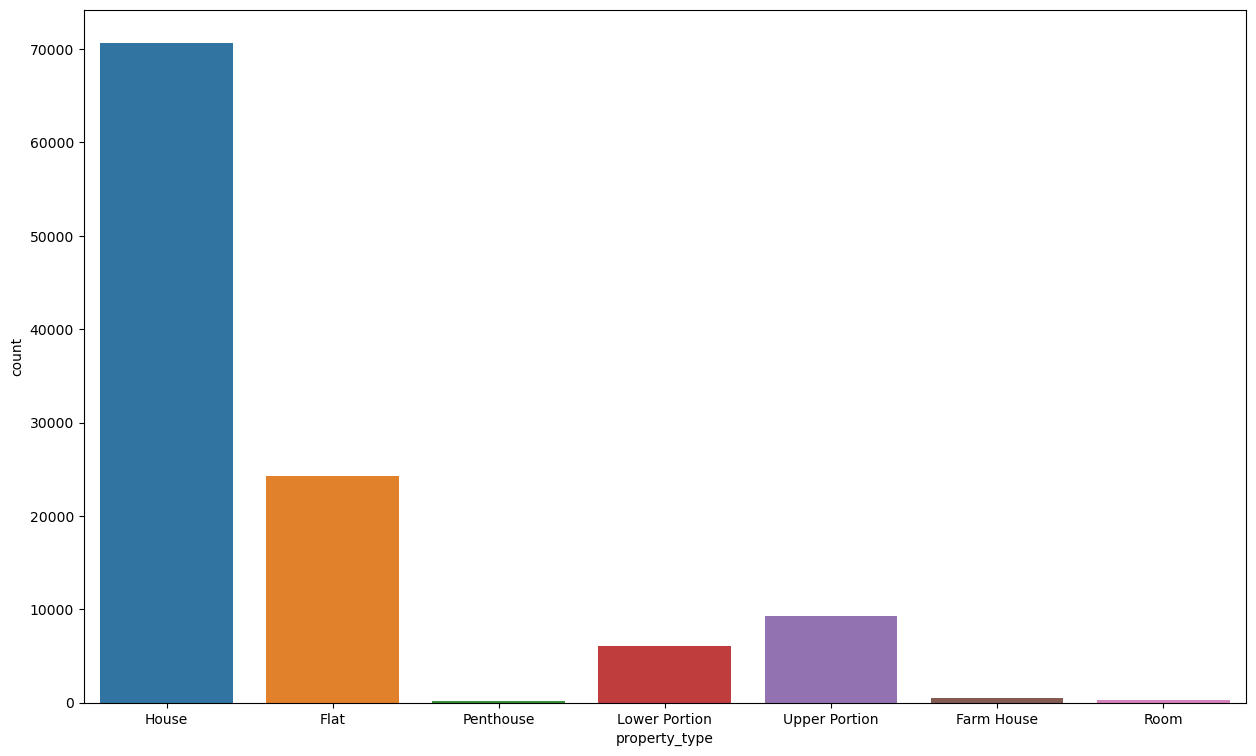

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,9))
sns.countplot(x=df['property_type'])

In [13]:
df['city'].value_counts()

Karachi       39221
Lahore        28507
Islamabad     25546
Rawalpindi    13111
Faisalabad     4887
Name: city, dtype: int64

<Axes: xlabel='city', ylabel='count'>

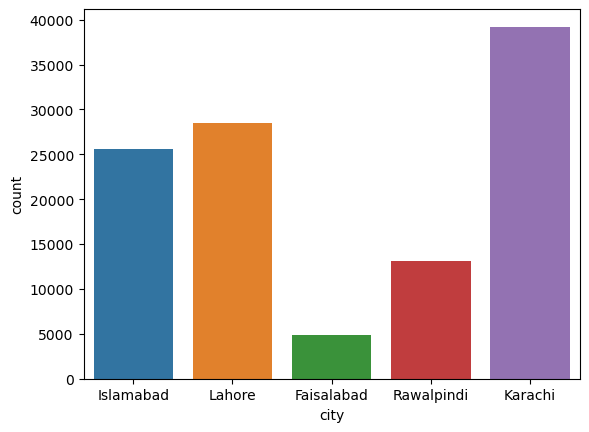

In [14]:
# most of the houses are located in kerachi city and low in faisalsbad city
sns.countplot(x=df['city'])

In [15]:
df['province_name'].value_counts()

Punjab               46505
Sindh                39221
Islamabad Capital    25546
Name: province_name, dtype: int64

<Axes: xlabel='province_name', ylabel='count'>

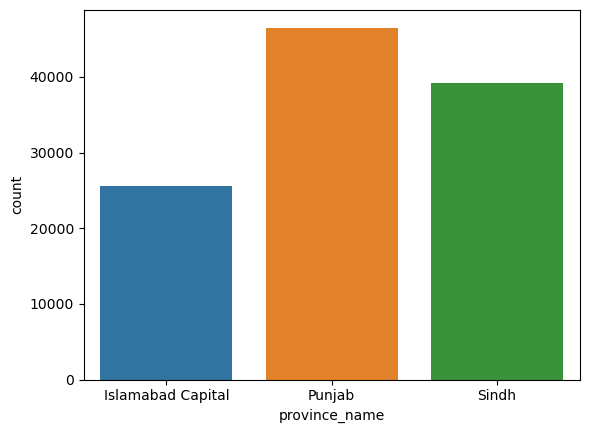

In [16]:
sns.countplot(x=df['province_name'])

In [17]:
df['purpose'].value_counts()

For Sale    79363
For Rent    31909
Name: purpose, dtype: int64

In [18]:
df['area'].value_counts()

1 Kanal       15628
10 Marla      12512
5 Marla       12223
8 Marla        7023
4 Marla        4019
              ...  
7.1 Kanal         1
21.3 Kanal        1
416 Kanal         1
61.7 Kanal        1
5.9 Kanal         1
Name: area, Length: 327, dtype: int64

In [19]:
df['agency'].value_counts()

Mash Allah Estate & Builders            528
Real Investment Consultants             460
Arham Estate                            365
Future Planners                         364
Lahore Grande Estate                    346
                                       ... 
Ideal Builder & Marketing Associates      1
Al Qaim Enterprises                       1
Awbir Services                            1
Property Max                              1
Al Barka Property Consultant              1
Name: agency, Length: 5761, dtype: int64

In [20]:
df['Area Type'].value_counts()

Marla    87493
Kanal    23779
Name: Area Type, dtype: int64

<Axes: xlabel='Area Type', ylabel='count'>

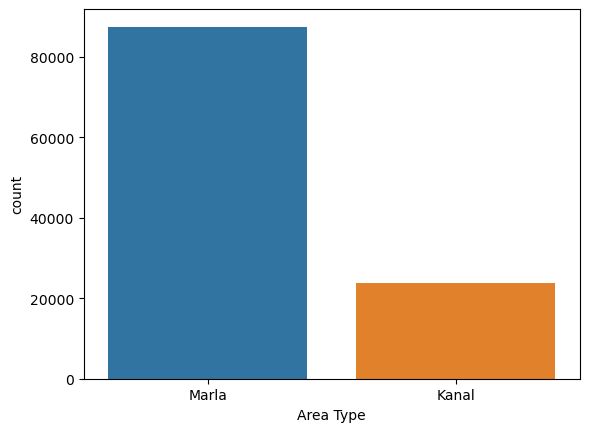

In [21]:
sns.countplot(x=df['Area Type'])

In [22]:
df['Area Category'].value_counts()

0-5 Marla        37878
5-10 Marla       37625
1-5 Kanal        23339
10-15 Marla       9862
15-20 Marla       2128
5-10 Kanal         250
15-20 Kanal         73
20-30 Kanal         40
10-15 Kanal         32
30-40 Kanal         12
40-50 Kanal          8
60-70 Kanal          6
400-500 Kanal        5
80-90 Kanal          4
200-300 Kanal        3
100-200 Kanal        2
90-100 Kanal         1
50-60 Kanal          1
600-700 Kanal        1
70-80 Kanal          1
700-800 Kanal        1
Name: Area Category, dtype: int64

In [23]:
df['location'].value_counts()

DHA Defence                18037
Bahria Town Karachi         6583
Bahria Town Rawalpindi      5502
Bahria Town                 4094
Gulistan-e-Jauhar           3439
                           ...  
Himat Pura                     1
Ahmed Town                     1
Shershah Colony - Ichra        1
Bilal Road                     1
Al-Hafeez Garden Road          1
Name: location, Length: 1087, dtype: int64

### Let's explore the numerical cols and see if their are outliers

<Axes: xlabel='price'>

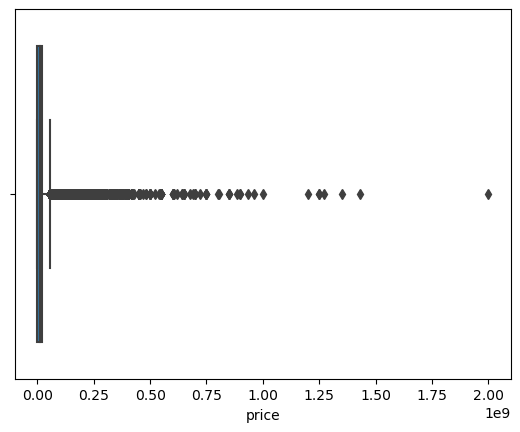

In [24]:
sns.boxplot(x=df['price'])

<Axes: xlabel='latitude'>

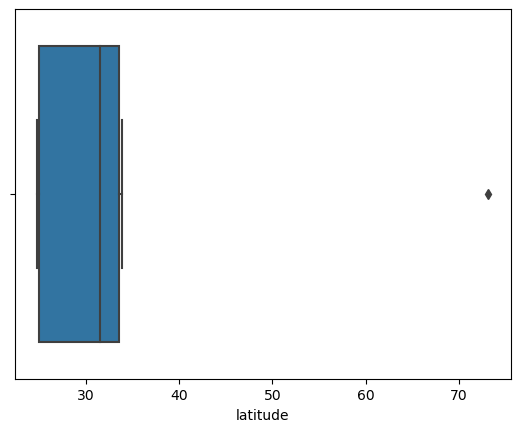

In [25]:
sns.boxplot(x=df['latitude'])

<Axes: xlabel='longitude'>

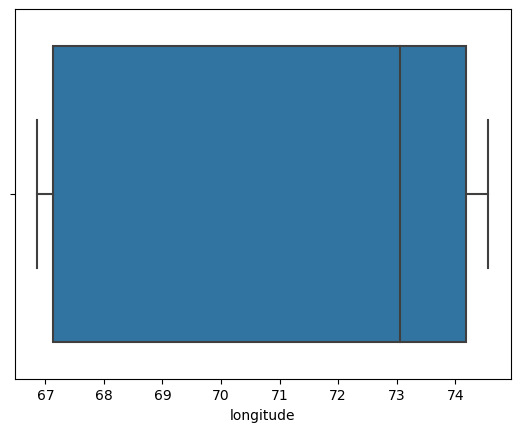

In [26]:
sns.boxplot(x=df['longitude'])

<Axes: xlabel='baths'>

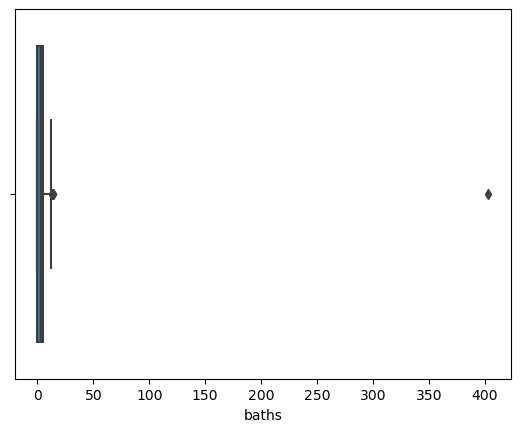

In [27]:
sns.boxplot(x=df['baths'])

<Axes: xlabel='bedrooms'>

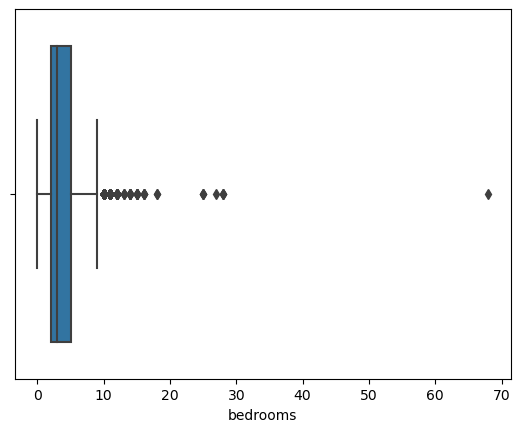

In [28]:
sns.boxplot(x=df['bedrooms'])

<Axes: xlabel='Area Size'>

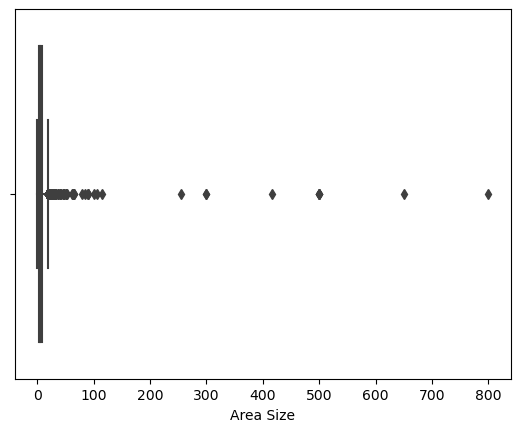

In [29]:
sns.boxplot(x=df['Area Size'])

In [30]:
numeric_cols = ['price','latitude','baths','bedrooms','Area Size']

In [31]:
df.shape

(111272, 17)

In [32]:
def remove_outliers_iqr(data, columns):
    df_clean = data.copy()  # Create a copy of the original DataFrame
    
    for col in columns:
        # Calculate the first and third quartiles
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        
        # Calculate the IQR (Interquartile Range)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out the outliers
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

In [33]:
df_cleaned = remove_outliers_iqr(df, numeric_cols)

In [34]:
df_cleaned.shape

(101354, 17)

## We need to shorten some of the categories

In [35]:
def shorten_categories(x,cut_off):
    cat_map = {}
    for i in range(len(x)):
        if x.values[i] >= cut_off:
            cat_map[x.index[i]] =x.index[i]
        else:
            cat_map[x.index[i]] = 'Other'
            
    return cat_map

In [36]:
df_cleaned['location'] = df_cleaned['location'].map(shorten_categories(df_cleaned['location'].value_counts(),1000))

In [37]:
df_cleaned['agency'] = df_cleaned['agency'].map(shorten_categories(df_cleaned['agency'].value_counts(),100))

In [38]:
df_cleaned['area'] = df_cleaned['area'].map(shorten_categories(df_cleaned['area'].value_counts(),900))

In [39]:
df_cleaned['Area Category'] = df_cleaned['Area Category'].map(shorten_categories(df_cleaned['Area Category'].value_counts(),200))

In [40]:
df_cleaned['property_type'] = df_cleaned['property_type'].map(shorten_categories(df_cleaned['property_type'].value_counts(),500))

In [41]:
df_cleaned = df_cleaned[df_cleaned['location'] != 'Other']
df_cleaned = df_cleaned[df_cleaned['agency'] != 'Other']
df_cleaned = df_cleaned[df_cleaned['area'] != 'Other']
df_cleaned = df_cleaned[df_cleaned['Area Category'] != 'Other']
df_cleaned = df_cleaned[df_cleaned['property_type'] != 'Other']

In [42]:
df_cleaned['location'].value_counts()

Bahria Town Karachi       3078
DHA Defence               3066
Bahria Town               1722
Bahria Town Rawalpindi     955
I-8                        619
G-13                       599
Gulistan-e-Jauhar          438
North Karachi              318
Johar Town                 210
Scheme 33                  203
E-11                       156
Clifton                    112
North Nazimabad            107
Gulshan-e-Iqbal Town        90
G-11                        45
F-11                        28
Gadap Town                  15
Cantt                        4
Federal B Area               1
Name: location, dtype: int64

In [43]:
df_cleaned['agency'].value_counts()

Mash Allah Estate & Builders          450
Real Investment Consultants           445
Arham Estate                          356
Lahore Grande Estate                  291
Makkah Associates                     273
                                     ... 
Estate 99                               3
Safa Enterprises                        2
Abdullah Associates                     1
Jaffar Estate & Builders (Pvt) Ltd      1
Kashmir Corporation                     1
Name: agency, Length: 109, dtype: int64

In [44]:
df_cleaned['area'].value_counts()

1 Kanal       2636
10 Marla      2487
8 Marla       1942
5 Marla        919
4.2 Marla      668
12 Marla       474
4.8 Marla      419
6 Marla        376
7 Marla        339
9.6 Marla      304
14.2 Marla     283
4 Marla        273
4.4 Marla      198
14 Marla       159
16 Marla       115
5.3 Marla       78
2 Kanal         48
2 Marla         28
3 Marla         20
Name: area, dtype: int64

In [45]:
df_cleaned['property_type'].value_counts()

House            8390
Flat             1737
Upper Portion     940
Lower Portion     699
Name: property_type, dtype: int64

In [46]:
df_cleaned['Area Category'].value_counts()

5-10 Marla     5526
1-5 Kanal      2684
0-5 Marla      2525
10-15 Marla     916
15-20 Marla     115
Name: Area Category, dtype: int64

In [47]:
df_cleaned.drop(['agent','date_added'],axis = 1,inplace=True)

In [48]:
df_cleaned.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,agency,Area Type,Area Size,Area Category
16,House,19000000,DHA Defence,Islamabad,Islamabad Capital,33.508481,73.091826,3,10 Marla,For Sale,3,Infinity Properties,Marla,10.0,5-10 Marla
106,House,37000000,Bahria Town Rawalpindi,Rawalpindi,Punjab,33.555451,73.138218,8,1 Kanal,For Sale,6,Al-Ghous Real Estate Management & Construction,Kanal,1.0,1-5 Kanal
107,House,23000000,Bahria Town Rawalpindi,Rawalpindi,Punjab,33.555594,73.133669,6,12 Marla,For Sale,5,Al-Ghous Real Estate Management & Construction,Marla,12.0,10-15 Marla
108,House,39500000,Bahria Town Rawalpindi,Rawalpindi,Punjab,33.558920,73.118649,7,1 Kanal,For Sale,6,Al-Ghous Real Estate Management & Construction,Kanal,1.0,1-5 Kanal
109,House,21000000,Bahria Town Rawalpindi,Rawalpindi,Punjab,33.555451,73.138218,7,10 Marla,For Sale,5,Al-Ghous Real Estate Management & Construction,Marla,10.0,5-10 Marla


## Now let's convert categorical features to numerical

In [49]:
df_cleaned['province_name'] = df_cleaned['province_name'].map({'Punjab':2,'Sindh':1,'Islamabad Capital': 0})
df_cleaned['purpose'] = df_cleaned['purpose'].map({'For Sale':1,'For Rent':0})
df_cleaned['Area Type'] = df_cleaned['Area Type'].map({'Marla':1,'Kanal':0})
df_cleaned['property_type'] = df_cleaned['property_type'].map({'House':3,'Flat':2,'Upper Portion':1,'Lower Portion':0})
df_cleaned['city'] = df_cleaned['city'].map({'Karachi':4,'Lahore':3,'Islamabad':2,'Rawalpindi':1,'Faisalabad':0})

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
le_location = LabelEncoder()
le_area = LabelEncoder()
le_area_cat = LabelEncoder()

In [52]:
df_cleaned['location'] = le_location.fit_transform(df_cleaned['location'])
df_cleaned['area'] = le_area.fit_transform(df_cleaned['area'])
df_cleaned['Area Category'] = le_area_cat.fit_transform(df_cleaned['Area Category'])

In [53]:
df_cleaned.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,agency,Area Type,Area Size,Area Category
16,3,19000000,5,2,0,33.508481,73.091826,3,1,1,3,Infinity Properties,1,10.0,4
106,3,37000000,2,1,2,33.555451,73.138218,8,0,1,6,Al-Ghous Real Estate Management & Construction,0,1.0,1
107,3,23000000,2,1,2,33.555594,73.133669,6,2,1,5,Al-Ghous Real Estate Management & Construction,1,12.0,2
108,3,39500000,2,1,2,33.558920,73.118649,7,0,1,6,Al-Ghous Real Estate Management & Construction,0,1.0,1
109,3,21000000,2,1,2,33.555451,73.138218,7,1,1,5,Al-Ghous Real Estate Management & Construction,1,10.0,4


In [54]:
df_cleaned.drop('agency',axis=1,inplace = True)
df_cleaned = df_cleaned[['property_type','location','city','province_name','latitude','longitude','baths','purpose','bedrooms','Area Type','Area Size','Area Category','price']]
df_cleaned.head()

,property_type,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,Area Type,Area Size,Area Category,price
16,3,5,2,0,33.508481,73.091826,3,1,3,1,10.0,4,19000000
106,3,2,1,2,33.555451,73.138218,8,1,6,0,1.0,1,37000000
107,3,2,1,2,33.555594,73.133669,6,1,5,1,12.0,2,23000000
108,3,2,1,2,33.558920,73.118649,7,1,6,0,1.0,1,39500000
109,3,2,1,2,33.555451,73.138218,7,1,5,1,10.0,4,21000000


In [55]:
df_cleaned = df_cleaned.reset_index()

In [56]:
df_cleaned.drop('index',axis=1,inplace=True)
df_cleaned.head(2)

,property_type,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,Area Type,Area Size,Area Category,price
0,3,5,2,0,33.508481,73.091826,3,1,3,1,10.0,4,19000000
1,3,2,1,2,33.555451,73.138218,8,1,6,0,1.0,1,37000000


<Axes: >

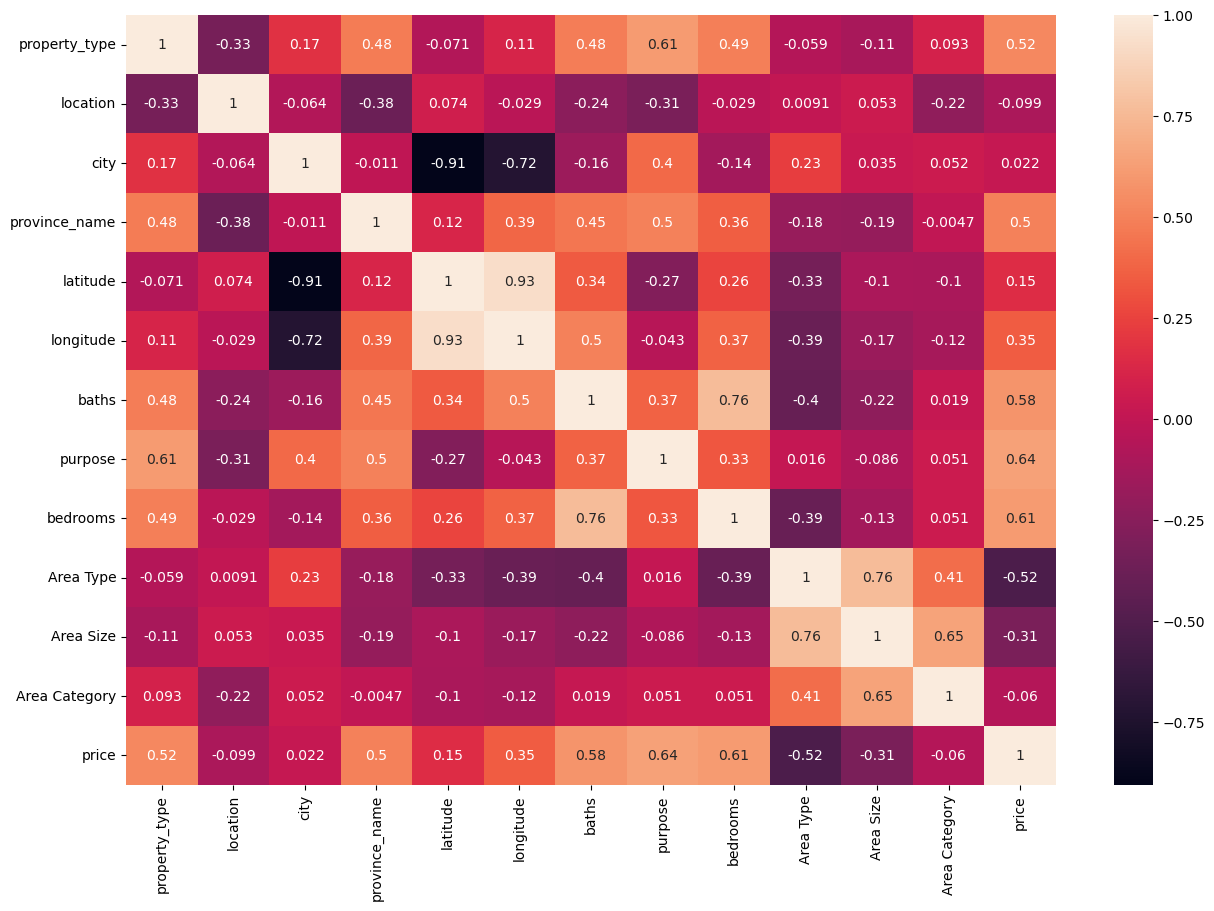

In [57]:
plt.figure(figsize=(15,10))
sns.heatmap(df_cleaned.corr(),annot=True)

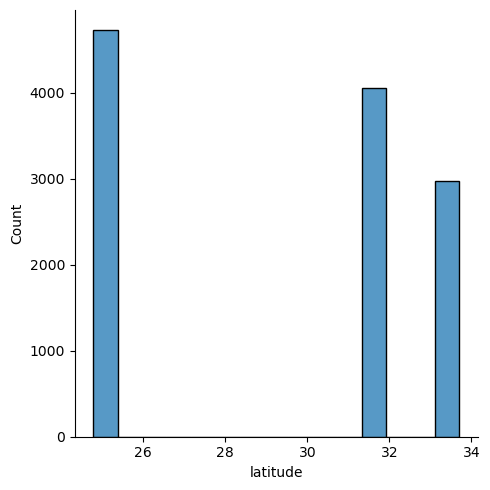

In [58]:
import numpy as np
sns.displot(x=df_cleaned['latitude'])

In [59]:
#importing some useful sklearn libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [60]:
X = df_cleaned.drop('price',axis=1)
y = df_cleaned['price']

In [61]:
#splitting into trainng and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [62]:
#scaling the variables to a specific range
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [63]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method = 'yeo-johnson')
power.fit(X_train)
X_train = power.transform(X_train)
X_test = power.transform(X_test)

In [64]:
param_grid = {
    'n_estimators':[10,30,50,60],
    'max_depth':[10,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
grid = GridSearchCV(estimator = RandomForestRegressor(),param_grid=param_grid,cv=5,return_train_score=False)

In [65]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 30, 50, 60]})

In [66]:
print(f'Best Parameters: {grid.best_params_}')

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 30}


### Trying out different models

In [67]:
model = RandomForestRegressor(max_depth=20,min_samples_leaf=1,min_samples_split=10,n_estimators=60)

In [68]:
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_split=10, n_estimators=60)

In [69]:
y_pred = model.predict(X_test)

In [70]:
print(mean_absolute_error(y_test,y_pred))

1545071.735835874


In [71]:
print(r2_score(y_test,y_pred))

0.9663951623906175


In [72]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

In [73]:
model2.fit(X_train,y_train)

LinearRegression()

In [74]:
pred = model2.predict(X_test)

In [75]:
print(r2_score(y_test,pred))

0.8161570982086703


In [76]:
from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor()

In [77]:
model3.fit(X_train,y_train)
prediction = model3.predict(X_test)
print(r2_score(y_test,prediction))

0.958421953853356


### RandomForestRegressor has the best score

In [80]:
import pickle
data = {'model':model,'le_location':le_location,'le_area_cat':le_area_cat}
with open('z_house.pkl','wb') as file:
    pickle.dump(data,file)